In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline 

## 1.1Fitting the model to the data 

In [2]:
# Loading  a dataset for classification Problem

heart_diesase = pd.read_csv("https://docs.google.com/spreadsheets/d/1Cm_sP6krAIxTbg-G3JWavWUcQyed3IITbFbttlXIh9k/export?gid=1886998129&format=csv")
heart_diesase.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Now trying with Random Forest Classifier model for classification
from sklearn.ensemble import RandomForestClassifier

np.random.seed(14)

# Creating feature and Lables
X = heart_diesase.drop("target", axis=1)
Y = heart_diesase["target"]

# Split Data into train and test samples
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=14)

# Initiate the model
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)

# Evaluate the model
clf.score(X_test, Y_test)

0.7540983606557377

## 1.2 Make Predictions using a ML Model

* `predict()`
* `predict_proba()`

In [4]:
# use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [5]:
Y_test

240    0
117    1
175    0
274    0
254    0
      ..
130    1
116    1
8      1
3      1
194    0
Name: target, Length: 61, dtype: int64

In [6]:
# Compare the prediction with the truth values to evalute the models 
y_pred  = clf.predict(X_test)
np.mean(y_pred == Y_test)

0.7540983606557377

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.7540983606557377

Make prediction with `predict_proba()`

In [8]:
# preict_proba() returns probability of the classification models
clf.predict_proba(X_test[:5])

array([[0.88, 0.12],
       [0.38, 0.62],
       [0.79, 0.21],
       [0.75, 0.25],
       [0.28, 0.72]])

`predict` can be used in regression problems

In [9]:
# Get California Housing Dataset
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["MedHouseVal"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [10]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(40)

# Data Preparation
X = housing_df.drop("MedHouseVal", axis=1)
Y = housing_df["MedHouseVal"]

# Spliting the Data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Model Creation
model = RandomForestRegressor(n_estimators=100)

# Train the model
model.fit(X_train, Y_train)

# Predits the test values
y_preds = model.predict(X_test)
y_preds

array([1.92919  , 2.29528  , 0.7784598, ..., 1.9455   , 1.99384  ,
       0.98725  ])

In [11]:
y_preds[:10]

array([1.92919  , 2.29528  , 0.7784598, 1.98394  , 1.47942  , 1.52489  ,
       3.4511201, 1.28298  , 3.37867  , 3.3638801])

In [12]:
np.array(Y_test)

array([2.265, 1.962, 1.458, ..., 1.815, 1.832, 0.822])

In [13]:
# Comparing the values
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, y_preds)

0.34112369198158937

In [14]:
model.score(X_test, Y_test)

0.8006317374189605

## 2. Evaluating a Machine Learning Model

Three ways of evaluating the models:

* Build in `Score` Method
* The `Scoring` Parameters
* Problem specific metric functons

### 2.1 Evaluating with `Score` Method

In [15]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(40)

# Creating feature and Lables
X = heart_diesase.drop("target", axis=1)
Y = heart_diesase["target"]

# Split Data into train and test samples
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=14)

# Initiate the model
clf = RandomForestClassifier(n_estimators=100)

# Fit the model
clf.fit(X_train, Y_train)


RandomForestClassifier()

In [16]:
clf.score(X_train, Y_train)

1.0

In [17]:
clf.score(X_test, Y_test)

0.7377049180327869

`score()` method for Regression Problems

In [18]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(14)

# Data Preparation
X = housing_df.drop("MedHouseVal", axis=1)
Y = housing_df["MedHouseVal"]

# Spliting the Data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Model Creation
model = RandomForestRegressor(n_estimators=1000)

# Train the model
model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=1000)

In [19]:
model.score(X_train, Y_train)

0.9745241568967612

In [20]:
model.score(X_test, Y_test)

0.8166731573368636

In [21]:
Y_preds = model.predict(X_test)
Y_preds

array([1.581898  , 2.62903803, 1.040076  , ..., 2.55591132, 0.96016687,
       1.776958  ])

## 2.2 Evaluating models using `scoring` parameters
1. Cross Validation

In [22]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(45)

# Creating feature and Lables
X = heart_diesase.drop("target", axis=1)
Y = heart_diesase["target"]

# Split Data into train and test samples
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=14)

# Initiate the model
clf = RandomForestClassifier(n_estimators=100)

# Fit the model
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [23]:
clf.score(X_test, Y_test)

0.7704918032786885

In [24]:
cross_val_score(clf, X, Y)

array([0.85245902, 0.90163934, 0.81967213, 0.8       , 0.76666667])

In [25]:
np.random.seed(50)

clf_single_score = clf.score(X_test, Y_test)

clf_cross_val_score = np.mean(cross_val_score(clf, X, Y, scoring=None))

clf_single_score, clf_cross_val_score

(0.7704918032786885, 0.8281967213114754)

## 2.3 Classification Model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification Report

**Accuracy**

In [26]:
np.random.seed(45)

# Creating feature and Lables
X = heart_diesase.drop("target", axis=1)
Y = heart_diesase["target"]

# Split Data into train and test samples
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=14)

# Initiate the model
clf = RandomForestClassifier(n_estimators=100)

# Fit the model
clf.fit(X_train, Y_train)

# cross validation
cross_validate_score = cross_val_score(clf, X, Y)

In [27]:
np.mean(cross_validate_score)

0.828087431693989

In [28]:
print(f"Heart Disease classification cross validation accuracy: {np.mean(cross_validate_score)*100:.2f}%")

Heart Disease classification cross validation accuracy: 82.81%


**Area under Receiver operating characteristic curve (AOC/ROC)**

ROC curve is the comparison of models True positive rate(TPR) vs False positive rate(FPR)

* True positive = predition is true and actual value is true
* False positive = predition is true and actual value is false
* True Negative = predition is false and actual value is false
* False Negative = predition is false and actual value is true

In [29]:
from sklearn.metrics import roc_curve

# Make Predictions 
Y_preds = clf.predict_proba(X_test)

Y_preds[:10]

array([[0.84, 0.16],
       [0.33, 0.67],
       [0.84, 0.16],
       [0.75, 0.25],
       [0.24, 0.76],
       [0.22, 0.78],
       [0.39, 0.61],
       [0.16, 0.84],
       [0.84, 0.16],
       [0.52, 0.48]])

In [30]:
Y_preds_positive = Y_preds[: , 1]
Y_preds_positive[:10]

array([0.16, 0.67, 0.16, 0.25, 0.76, 0.78, 0.61, 0.84, 0.16, 0.48])

In [31]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_preds_positive)

In [32]:
# create function to plot ROC
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='red')
    plt.plot([0,1], [0,1], color='darkblue', linestyle = '--', label="Guessing")
    
    plt.xlabel("False Positive Rate(FPR)")
    plt.ylabel("True Positive Rate(TPR)")
    plt.title("Receiver operating characteristic curve (ROC)")
    plt.legend()
    plt.show()

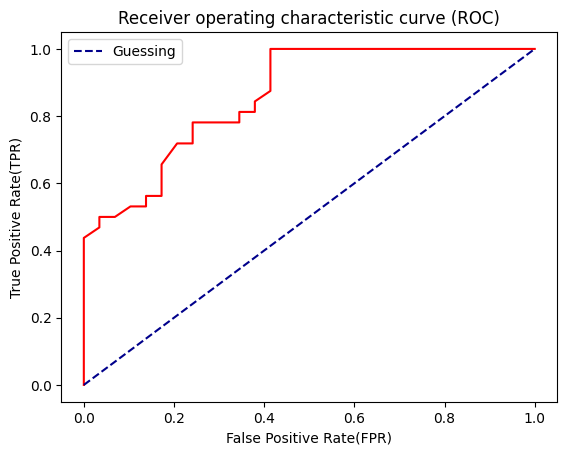

In [33]:
plot_roc_curve(fpr, tpr)

In [34]:
# AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_preds_positive)

0.8615301724137931

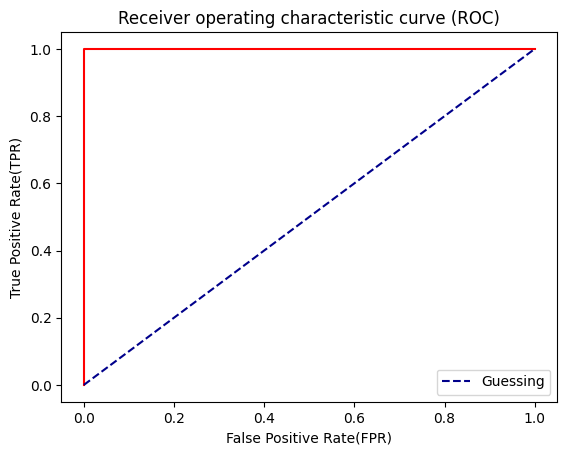

In [35]:
# For the perfect ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_test)
plot_roc_curve(fpr, tpr)

**Confusion Matrix**

Confusion Matrix is matrix with the value of True positive, False positive, True Negative, False Negative of the model 

In [36]:
from sklearn.metrics import confusion_matrix

Y_preds = clf.predict(X_test)

cf_matrix = confusion_matrix(Y_test, Y_preds)
cf_matrix

array([[22,  7],
       [ 7, 25]])

In [37]:
clf

RandomForestClassifier()

In [38]:
# Visualize confusion matrix
pd.crosstab(Y_test, Y_preds, rownames=["Actual values"], colnames=["Predicted values"])

Predicted values,0,1
Actual values,,
0,22,7
1,7,25


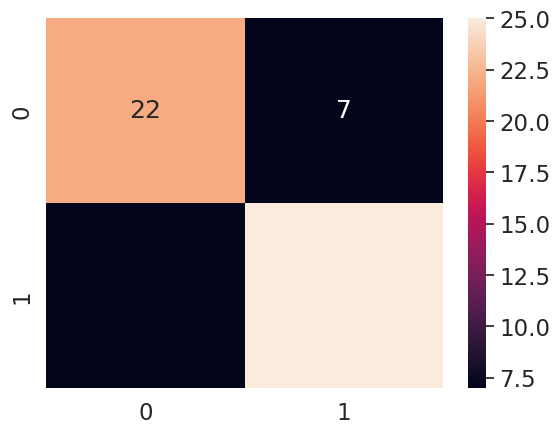

In [39]:
# Visualize confusion matrix with seaborn
import seaborn as sns

sns.set(font_scale=1.5)

sns.heatmap(cf_matrix, annot=True);

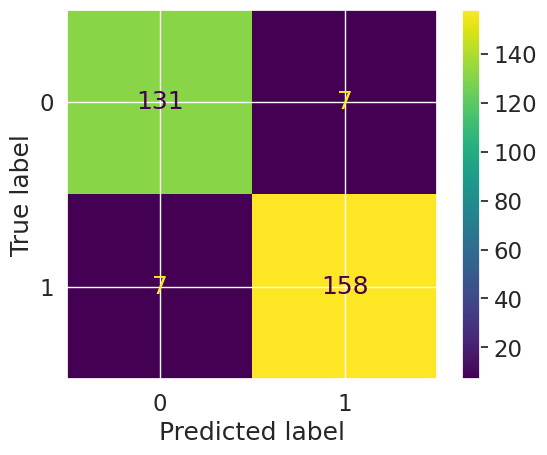

In [40]:
# Visualize confusion matrix with sklearn

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=Y);

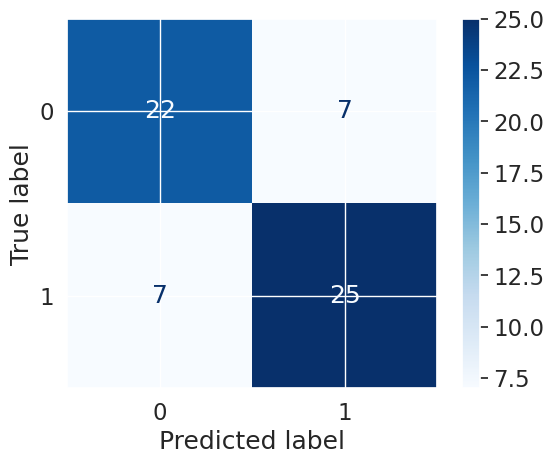

In [41]:
ConfusionMatrixDisplay.from_predictions(y_true=Y_test, y_pred=Y_preds, cmap='Blues');

#### cmap values 

cmap = [Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, 
BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, 
Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, 
Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, 
PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, 
RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, 
Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, 
YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn,
autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, 
cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, 
cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r,
gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, 
gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, 
gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, 
inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r,
ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, 
rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, 
tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, 
viridis, viridis_r, vlag, vlag_r, winter, winter_r]

**Classification Report**

In [42]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        29
           1       0.78      0.78      0.78        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [43]:
disease_true = np.zeros(10000)
disease_true[0] = 1

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

/home/alexender/Desktop/Projects/My_Projects/envs/Data_Science/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alexender/Desktop/Projects/My_Projects/envs/Data_Science/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alexender/Desktop/Projects/My_Projects/envs/Data_Science/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


## 2.4 Regression Model Evaluation Metrics

Docs --> https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

We are covering:
* R^2 - r-squared or Coefficient of determination
* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)

**An R-Squared value shows how well the model predicts the outcome of the dependent variable. R-Squared values range from 0 to 1. An R-Squared value of 0 means that the model explains or predicts 0% of the relationship between the dependent and independent variables.**

In [44]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Data Preparation
X = housing_df.drop("MedHouseVal", axis=1)
Y = housing_df["MedHouseVal"]

# Spliting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, Y_train)


RandomForestRegressor()

In [45]:
model.score(X_test, Y_test)

0.8066196804802649

In [46]:
np.mean(Y_test)

2.0550030959302323

In [47]:
from sklearn.metrics import r2_score
Y_preds = model.predict(X_test)

r2_score(y_true=Y_test, y_pred=Y_preds)

0.8066196804802649

**Mean Absolute Error**

MAE is the average of absolute difference between predicted value and actual value

In [48]:
from sklearn.metrics import mean_absolute_error

Y_preds = model.predict(X_test)
mean_absolute_error(Y_test, Y_preds)

0.3265721842781009

**Mean Squared Error (MSE)**

The mean squared error or mean squared deviation of an estimator measures the average of the squares of the errors that is, the average squared difference between the estimated values and the actual value. 

In [50]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test, Y_preds)

0.2534073069137548

## 2.4 Other `Scoring` Parameters --> Classification

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_diesase.drop("target", axis=1)
Y = heart_diesase["target"]

clf = RandomForestClassifier(n_estimators=100)

In [56]:
np.random.seed(42)

# cross-validation for None

cv_acc = cross_val_score(clf, X, Y, scoring=None)
print(f"The cross-validation accuracy is {np.mean(cv_acc)*100:.2f}%")

The cross-validation accuracy is 82.48%


In [57]:
np.random.seed(42)

# cross-validation for accuracy

cv_acc = cross_val_score(clf, X, Y, scoring="accuracy")
print(f"The cross-validation accuracy is {np.mean(cv_acc)*100:.2f}%")

The cross-validation accuracy is 82.48%


In [59]:
np.random.seed(42)

# cross-validation for precision

cv_precision = cross_val_score(clf, X, Y, scoring="precision")
print(f"The cross-validation precision is {np.mean(cv_precision)*100:.2f}%")

The cross-validation precision is 83.30%


In [61]:
np.random.seed(42)

# cross-validation for recall

cv_recall = cross_val_score(clf, X, Y, scoring="recall")
print(f"The cross-validation recall is {np.mean(cv_recall)*100:.2f}%")

The cross-validation recall is 85.45%


In [62]:
np.random.seed(42)

# cross-validation for recall

cv_roc_auc = cross_val_score(clf, X, Y, scoring="roc_auc")
print(f"The cross-validation ROC AUC is {np.mean(cv_roc_auc)*100:.2f}%")

The cross-validation ROC AUC is 89.50%


## 2.5 Other `Scoring` Parameters --> Regression

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Data Preparation
X = housing_df.drop("MedHouseVal", axis=1)
Y = housing_df["MedHouseVal"]

# Spliting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model

RandomForestRegressor()

In [78]:
np.random.seed(42)

# cross-validation for r2

cv_r2 = cross_val_score(model, X, Y, cv=5, scoring="r2")
print(cv_r2)
print(f"The cross-validation R2 is {np.mean(cv_r2)*100:.2f}%")

[0.51682354 0.70280719 0.74200859 0.61659773 0.68247339]
The cross-validation R2 is 65.21%


In [79]:
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.8072979377261641

In [80]:
np.random.seed(42)

# cross-validation for MSE
cv_mae = cross_val_score(model, X, Y, cv=5, scoring="neg_mean_absolute_error")
print(cv_mae)
print(f"The cross-validation for MAE is {np.mean(cv_mae)}")

[-0.54255936 -0.40903449 -0.43716367 -0.46911343 -0.47319069]
The cross-validation for MAE is -0.4662123287693799


In [81]:
np.random.seed(42)

# cross-validation for MSE
cv_mse = cross_val_score(model, X, Y, cv=5, scoring="neg_mean_squared_error")
print(cv_mse)
print(f"The cross-validation for MSE is {np.mean(cv_mse)}")

[-0.51906307 -0.34788294 -0.37112854 -0.44980156 -0.4626866 ]
The cross-validation for MSE is -0.43011254261460774


## 2.6 Using different Metric Functions

Docs --> https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [90]:
# Classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X and Y
X = heart_diesase.drop("target", axis=1)
Y = heart_diesase["target"]

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Create model
clf = RandomForestClassifier(n_estimators=100)

# Fit the model
clf.fit(X_train, Y_train)
# print(clf.score(X_test, Y_test))

# Make Predictions
y_preds = clf.predict(X_test)

# Evaluation functions
print("Classification metrics on test set:")
print(f"Accuracy Score: {accuracy_score(y_true=Y_test, y_pred=y_preds)*100:.2f}%")
print(f"Precision Score: {precision_score(y_true=Y_test, y_pred=y_preds)}")
print(f"Recall Score: {recall_score(y_true=Y_test, y_pred=y_preds)}")
print(f"F1 Score: {f1_score(y_true=Y_test, y_pred=y_preds)}")

Classification metrics on test set:
Accuracy Score: 85.25%
Precision Score: 0.8484848484848485
Recall Score: 0.875
F1 Score: 0.8615384615384615


In [94]:
# Regression models
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X and Y
X = housing_df.drop("MedHouseVal", axis=1)
Y = housing_df["MedHouseVal"]

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Create model
model = RandomForestRegressor(n_estimators=100)

# Fit the model
model.fit(X_train, Y_train)

# Make Predictions
y_preds=model.predict(X_test)

# Evaluation functions
print("Regression metrics on test set:")
print(f"R2 Score: {r2_score(y_true=Y_test, y_pred=y_preds)*100:.2f}%")
print(f"MAE Score: {mean_absolute_error(y_true=Y_test, y_pred=y_preds)}")
print(f"MSE Score: {mean_squared_error(y_true=Y_test, y_pred=y_preds)}")

Regression metrics on test set:
R2 Score: 80.66%
MAE Score: 0.3265721842781009
MSE Score: 0.2534073069137548
